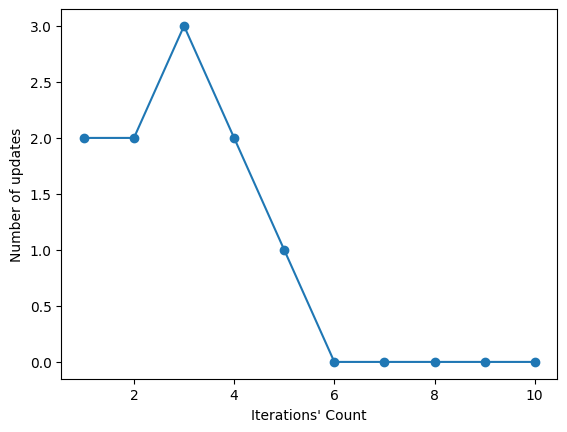

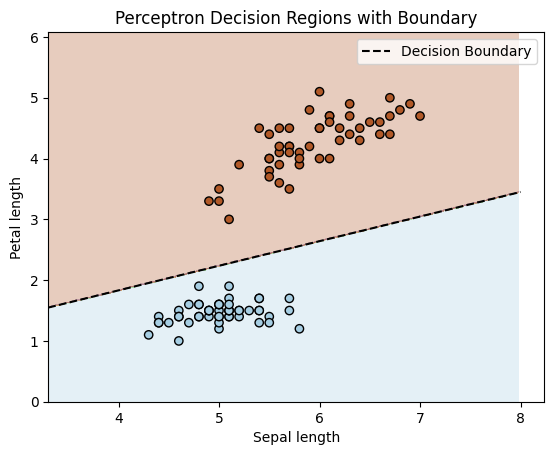

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
  def __init__(self, learningRate, visitCount, randomSeed):
    self.learningRate = learningRate #How much fixing is done if an error is encountered
    self.visitCount = visitCount #How many times to go through the data
    self.randomSeed = randomSeed #For regenerating exactly the same random sequence in the future

  def training(self, inputMatrix, classLabels):
    self.weights_ = []
    np.random.seed(self.randomSeed)

    #fill-up the weights vector primarily with random weights and bias
    for i in range(len(inputMatrix[0])+1):
      self.weights_.append(np.random.rand()*0.01)

    self.weights_ = np.array(self.weights_)

    self.errorAmounts_ = []

    #Main training loop begins
    for i in range(self.visitCount):

      currErrorAmount = 0

      for xi, actualClass in zip(inputMatrix, classLabels):
        update = self.learningRate * (actualClass - self.predict(xi))
        self.weights_[0] += update
        self.weights_[1:] += update * xi #Update each respective weights with necessary update except the bias

        if (update != 0.0):
          currErrorAmount += 1;

      self.errorAmounts_.append(currErrorAmount) #Keep track of error amount at each iteration
    return self

  def predict(self, rowOfInputMatrix):  # z = w1x1 + w2x2 + ... + wmxm + bias (y = mx + c)
        return 1 if (np.dot(rowOfInputMatrix, self.weights_[1:]) + self.weights_[0]) >= 0 else -1

#Now fetching some sample data from web (in our case, the Iris dataset):
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

df = pd.read_csv(s, header=None, encoding='utf-8')

#Prepare the inputMatrix and classLabels vector for training:
classLabels = df.iloc[0:100, 4].values
classLabels = np.where(classLabels == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
inputMatrix = df.iloc[0:100, [0, 2]].values

#Time for the Perceptron to observe in action:
ppn = Perceptron(0.1, 10, 1)
ppn.training(inputMatrix, classLabels)

plt.plot(range(1, len(ppn.errorAmounts_) + 1), ppn.errorAmounts_, marker='o')
plt.xlabel('Iterations\' Count')
plt.ylabel('Number of updates')
plt.show()


# Plotting the decision regions and boundary
plt.figure()

# Determine the range of the features
x1_min, x1_max = inputMatrix[:, 0].min() - 1, inputMatrix[:, 0].max() + 1
x2_min, x2_max = inputMatrix[:, 1].min() - 1, inputMatrix[:, 1].max() + 1

# Create a mesh grid of points
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# Compute predictions for each grid point
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
decision_values = np.dot(grid_points, ppn.weights_[1:]) + ppn.weights_[0]
Z = np.where(decision_values >= 0, 1, -1)
Z = Z.reshape(xx1.shape)

# Plot the decision regions
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the original data points
plt.scatter(inputMatrix[:, 0], inputMatrix[:, 1], c=classLabels, cmap=plt.cm.Paired, edgecolor='k')

# Plot the decision boundary line
x1_plot = np.array([x1_min, x1_max])
x2_plot = (-ppn.weights_[0] - ppn.weights_[1] * x1_plot) / ppn.weights_[2]
plt.plot(x1_plot, x2_plot, 'k--', label='Decision Boundary')

# Add labels and title
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron Decision Regions with Boundary')
plt.legend()
plt.show()
